In [1]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 https://developer.download.nvidia.com/compute/c

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
import findspark
findspark.init()

spark-2.4.0-bin-hadoop2.7/
spark-2.4.0-bin-hadoop2.7/python/
spark-2.4.0-bin-hadoop2.7/python/setup.cfg
spark-2.4.0-bin-hadoop2.7/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.0-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.0-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.0-bin-hadoop2.7/python/pyspark

In [ ]:
# import findspark
# findspark.init()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
%cd '/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/Chapter5/'

/content/gdrive/My Drive/LDS9_K273_ONLINE_BuiThiHuong/Chapter5


In [5]:
# import libraries
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from pyspark.sql.functions import mean, stddev, col, log
from pyspark.sql.functions import to_date, dayofweek, to_timestamp
from pyspark.sql import types 
from pyspark.sql.functions import col, udf
from pyspark.sql.types import DateType
from pyspark.sql.functions import year, month
from pyspark.sql.functions import dayofmonth, weekofyear
from pyspark.sql.functions import split, explode
from pyspark.sql.functions import coalesce, first, lit
from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import Bucketizer
from pyspark.ml.feature import OneHotEncoder, StringIndexer
from pyspark.sql.functions import regexp_extract, col
from pyspark.sql.functions import datediff
from pyspark.sql.functions import when

In [6]:
sc =SparkContext()

In [7]:
spark = SparkSession(sc)

In [39]:
# read data from csv file
df = spark.read.csv("2017_StPaul_MN_Real_Estate.csv", header=True, inferSchema=True)

In [40]:
df.head(1)

[Row(No=1, MLSID='RMLS', StreetNumberNumeric=11511, streetaddress='11511 Stillwater Blvd N', STREETNAME='Stillwater', PostalCode=55042, StateOrProvince='MN', City='LELM - Lake Elmo', SalesClosePrice=143000, LISTDATE='7/15/2017 0:00', LISTPRICE=139900, LISTTYPE='Exclusive Right', OriginalListPrice=139900, PricePerTSFT=145.9184, FOUNDATIONSIZE=980, FENCE='Other', MapLetter='C4', LotSizeDimensions='279X200', SchoolDistrictNumber='834 - Stillwater', DAYSONMARKET=10, offmarketdate='7/30/2017 0:00', Fireplaces=0, RoomArea4='12 x  9', roomtype='Living Room, Dining Room, Family Room, Kitchen, First (1st) Bedroom, Second (2nd) Bedroom, Third (3rd) Bedroom, Fourth (4th) Bedroom, Deck', ROOF=None, RoomFloor4='Main', PotentialShortSale='No', PoolDescription=None, PDOM=10, GarageDescription='Attached Garage', SQFTABOVEGROUND=980, Taxes=1858, RoomFloor1='Main', RoomArea1='16 x 13', TAXWITHASSESSMENTS=1858.0, TAXYEAR=2017, LivingArea=980, UNITNUMBER=None, YEARBUILT=1950, ZONING='Residential-Single', 

In [41]:
print((df.count(), len(df.columns)))

(5000, 74)


In [42]:
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- MLSID: string (nullable = true)
 |-- StreetNumberNumeric: integer (nullable = true)
 |-- streetaddress: string (nullable = true)
 |-- STREETNAME: string (nullable = true)
 |-- PostalCode: integer (nullable = true)
 |-- StateOrProvince: string (nullable = true)
 |-- City: string (nullable = true)
 |-- SalesClosePrice: integer (nullable = true)
 |-- LISTDATE: string (nullable = true)
 |-- LISTPRICE: integer (nullable = true)
 |-- LISTTYPE: string (nullable = true)
 |-- OriginalListPrice: integer (nullable = true)
 |-- PricePerTSFT: double (nullable = true)
 |-- FOUNDATIONSIZE: integer (nullable = true)
 |-- FENCE: string (nullable = true)
 |-- MapLetter: string (nullable = true)
 |-- LotSizeDimensions: string (nullable = true)
 |-- SchoolDistrictNumber: string (nullable = true)
 |-- DAYSONMARKET: integer (nullable = true)
 |-- offmarketdate: string (nullable = true)
 |-- Fireplaces: integer (nullable = true)
 |-- RoomArea4: string (nullable = 

In [43]:
# create df_sub from df
df_sub = df.select('STREETNUMBERNUMERIC', 'FIREPLACES', 
                   'LOTSIZEDIMENSIONS', 'LISTTYPE', 'ACRES', 
                   'ASSUMABLEMORTGAGE', 'SalesClosePrice', 'ListPrice',
                   'DAYSONMARKET')
df_sub.show(5)

+-------------------+----------+-----------------+---------------+-----+-----------------+---------------+---------+------------+
|STREETNUMBERNUMERIC|FIREPLACES|LOTSIZEDIMENSIONS|       LISTTYPE|ACRES|ASSUMABLEMORTGAGE|SalesClosePrice|ListPrice|DAYSONMARKET|
+-------------------+----------+-----------------+---------------+-----+-----------------+---------------+---------+------------+
|              11511|         0|          279X200|Exclusive Right| 1.28|             null|         143000|   139900|          10|
|              11200|         0|          100x140|Exclusive Right| 0.32|             null|         190000|   210000|           4|
|               8583|         0|          120x296|Exclusive Right|0.822|    Not Assumable|         225000|   225000|          28|
|               9350|         1|          208X208|Exclusive Right| 0.94|             null|         265000|   230000|          19|
|               2915|         1|          116x200|Exclusive Right|  0.0|             null|

drop()

In [44]:
df_sub.drop(*['STREETNUMBERNUMERIC','LOTSIZEDIMENSIONS']).show(5)

+----------+---------------+-----+-----------------+---------------+---------+------------+
|FIREPLACES|       LISTTYPE|ACRES|ASSUMABLEMORTGAGE|SalesClosePrice|ListPrice|DAYSONMARKET|
+----------+---------------+-----+-----------------+---------------+---------+------------+
|         0|Exclusive Right| 1.28|             null|         143000|   139900|          10|
|         0|Exclusive Right| 0.32|             null|         190000|   210000|           4|
|         0|Exclusive Right|0.822|    Not Assumable|         225000|   225000|          28|
|         1|Exclusive Right| 0.94|             null|         265000|   230000|          19|
|         1|Exclusive Right|  0.0|             null|         249900|   239900|          21|
+----------+---------------+-----+-----------------+---------------+---------+------------+
only showing top 5 rows



In [45]:
# drop columns in list
df_sub = df_sub.drop(*['STREETNUMBERNUMERIC','LOTSIZEDIMENSIONS'])
df_sub.show(5)

+----------+---------------+-----+-----------------+---------------+---------+------------+
|FIREPLACES|       LISTTYPE|ACRES|ASSUMABLEMORTGAGE|SalesClosePrice|ListPrice|DAYSONMARKET|
+----------+---------------+-----+-----------------+---------------+---------+------------+
|         0|Exclusive Right| 1.28|             null|         143000|   139900|          10|
|         0|Exclusive Right| 0.32|             null|         190000|   210000|           4|
|         0|Exclusive Right|0.822|    Not Assumable|         225000|   225000|          28|
|         1|Exclusive Right| 0.94|             null|         265000|   230000|          19|
|         1|Exclusive Right|  0.0|             null|         249900|   239900|          21|
+----------+---------------+-----+-----------------+---------------+---------+------------+
only showing top 5 rows



filter data by text

In [46]:
# inspect unique values in the column 'ASSUMABLEMORTGAGE'
df_sub.select(['ASSUMABLEMORTGAGE']).distinct().show()

+-------------------+
|  ASSUMABLEMORTGAGE|
+-------------------+
|  Yes w/ Qualifying|
| Information Coming|
|               null|
|Yes w/No Qualifying|
|      Not Assumable|
+-------------------+



In [47]:
print('Before:', df_sub.count())

Before: 5000


In [48]:
# list of possible values containing 'yes'
yes_values = ['Yes w/ Qualifying', 'Yes w/No Qualifying']

# filter the text values out of df_sub but keep null values
text_filter = ~df_sub['ASSUMABLEMORTGAGE'].isin(yes_values) | df_sub['ASSUMABLEMORTGAGE'].isNull()

# print count of remaining records
df_sub = df_sub.where(text_filter)

In [49]:
print('After', df_sub.count())

After 4976


log, remove outliers

In [50]:
df_sub = df_sub.withColumn('log_SalesClosePrice', log(col('SalesClosePrice')))

In [51]:
df_sub.count()

4976

In [54]:
# calculate values used for outlier filtering
mean_val = df_sub.agg({'log_SalesClosePrice':'mean'}).collect()[0][0]
stddev_val = df_sub.agg({'log_SalesClosePrice':'stddev'}).collect()[0][0]
                        
# create three standard deviation lower and upper bounds for data
low_bound = mean_val - (3*stddev_val)
hi_bound = mean_val + (3*stddev_val)

# filter the data to fit between the lower and upper bounds
df_sub = df_sub.where((df_sub['log_SalesClosePrice'] < hi_bound) & (df_sub['log_SalesClosePrice'] > low_bound))

In [55]:
df_sub.count()

4946

delete na

In [56]:
df_sub.count()

4946

In [57]:
# drop records where at least two columns have NULL values 
df_sub = df_sub.dropna(thresh=2)
df_sub.count()

4946

In [58]:
# drop records if both ListPrice and SalesClosePrice are NULL
df_sub = df_sub.dropna(how='all', subset=['ListPrice','SalesClosePrice'])
df_sub.count()

4946

In [59]:
# drop any records with NULL values
df_sub = df_sub.dropna()
df_sub.count()

1863

delete duplicates

scaling

In [60]:
# calc max and min for new column
print(df_sub.agg({'SalesClosePrice':'max'}).collect())
print(df_sub.agg({'SalesClosePrice':'min'}).collect())

# define max and min values and collect them
max_price = df_sub.agg({'SalesClosePrice':'max'}).collect()[0][0]
min_price = df_sub.agg({'SalesClosePrice':'min'}).collect()[0][0]

# create a new column based off the scaled data
df_sub = df_sub.withColumn('scaled_price',
                           (df_sub['SalesClosePrice'] - min_price)/(max_price - min_price))

# calc max and min for new column
print(df_sub.agg({'scaled_price':'max'}).collect())
print(df_sub.agg({'scaled_price':'min'}).collect())

[Row(max(SalesClosePrice)=920000)]
[Row(min(SalesClosePrice)=62000)]
[Row(max(scaled_price)=1.0)]
[Row(min(scaled_price)=0.0)]


In [61]:
df_sub.select('scaled_price').show(5)

+-------------------+
|       scaled_price|
+-------------------+
|0.18997668997668998|
|0.22494172494172493|
|0.26561771561771563|
| 0.2540792540792541|
|0.29953379953379955|
+-------------------+
only showing top 5 rows



In [62]:
def min_max_scaler(df, cols_to_scale):
  # takes a dataframe and list of columns to minmax scale. Returns a dataframe
  for col in cols_to_scale:
    # define min and max values and collect them
    max_values = df.agg({col:'max'}).collect()[0][0]
    min_values = df.agg({col:'min'}).collect()[0][0]
    new_column_name = 'minmax_scaled_'+col
    # create a new column based off the scaled data
    df = df.withColumn(new_column_name,
                       (df[col] - min_values) / (max_values - min_values))
    return df

In [63]:
cols_to_scale = ['ListPrice']
df_sub = min_max_scaler(df_sub, cols_to_scale)
# show that our data is now between 0 and 1
df_sub[['ListPrice','minmax_scaled_ListPrice']].show(3)

+---------+-----------------------+
|ListPrice|minmax_scaled_ListPrice|
+---------+-----------------------+
|   225000|    0.19195442390419717|
|   239900|    0.20927799093128707|
|   299900|     0.2790373212417161|
+---------+-----------------------+
only showing top 3 rows



Tự viết StandardScaler, RobustScaler

Missing values

In [64]:
roof = df[['ROOF']]

In [65]:
roof.where(df['ROOF'].isNull()).count()

765

In [66]:
roof_pdf = roof.toPandas()

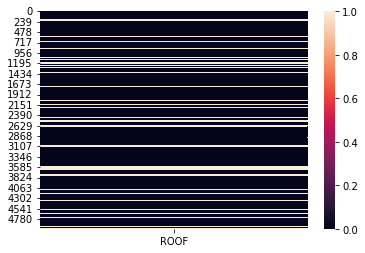

In [67]:
sns.heatmap(data=roof_pdf.isnull())

drop missing values

In [68]:
# drop null
def column_dropper(df, threshold):
    # Takes a dataframe and threshold for missing values. 
    # Returns a dataframe.
    total_records = df.count()
    for col in df.columns:
        # Calculate the percentage of missing values
        missing = df.where(df[col].isNull()).count()
        missing_percent = missing / total_records
        # Drop column if percent of missing is more than threshold
        if missing_percent > threshold:
            df = df.drop(col)
    return df

In [69]:
# drop columns that are more than 70% missing
df = column_dropper(df, 0.7)

fill missing values

In [71]:
# count missing rows
missing = df.where(df['PDOM'].isNull()).count()
# caculate the mean value
col_mean = df.agg({'PDOM':'mean'}).collect()[0][0]

# replacing with the mean value for that column
df.fillna(col_mean, subset=['PDOM'])

DataFrame[No: int, MLSID: string, StreetNumberNumeric: int, streetaddress: string, STREETNAME: string, PostalCode: int, StateOrProvince: string, City: string, SalesClosePrice: int, LISTDATE: string, LISTPRICE: int, LISTTYPE: string, OriginalListPrice: int, PricePerTSFT: double, FOUNDATIONSIZE: int, FENCE: string, MapLetter: string, LotSizeDimensions: string, SchoolDistrictNumber: string, DAYSONMARKET: int, offmarketdate: string, Fireplaces: int, RoomArea4: string, roomtype: string, ROOF: string, RoomFloor4: string, PotentialShortSale: string, PoolDescription: string, PDOM: int, GarageDescription: string, SQFTABOVEGROUND: int, Taxes: int, RoomFloor1: string, RoomArea1: string, TAXWITHASSESSMENTS: double, TAXYEAR: int, LivingArea: int, YEARBUILT: int, ZONING: string, STYLE: string, ACRES: double, CoolingDescription: string, APPLIANCES: string, ROOMFAMILYCHAR: string, RoomArea3: string, EXTERIOR: string, RoomFloor3: string, RoomFloor2: string, RoomArea2: string, DiningRoomDescription: str